<a href="https://colab.research.google.com/github/megghan/python_UFSCar/blob/main/PA2_Aula_7_Arvores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---
# <font color='blue'>PA2 - **Árvores como estrutura de dados**</font>
---
---
## **Conteúdo**

* ### Introdução

* ### Conceitos Básicos


* ### Árvores Binárias

  * ### Representação Computacional (POO)
  * ### Percursos

* ### Árvores Binárias de Busca

  * ### Adição e remoção de vértices: representação computacional em POO


---
---

# Introdução

Estruturas sequenciais são muito úteis na modelagem de diversos problemas simples. Entretanto, geralmente são ineficientes em modelar problemas mais complexos. Especificamente, aqueles que demandem uma organização hierárquica dos agentes envolvidos na solução. Esta dificildade surge em situações nas quais não é possível alinhar elementos de forma sequencial. Por exemplo, pode ser que seja necessário estabelecer o conceito de "níveis", sendo que alguns elementos estejam em mesmo nível.

Um exemplo clássico dessa deficiência das estruturas baseadas em listas sequenciais / lineares é a questão da organização das espécies. Em especial, a espécie humana. Não é incomum a consideração de que a evolução humana ocorreu de forma linear no sentido de que uma única espécie foi sofrendo uma série de mutações e seleções até a convergência para a espécie humana moderna *Homo sapiens sapiens*, como indicada pela figura a seguir.

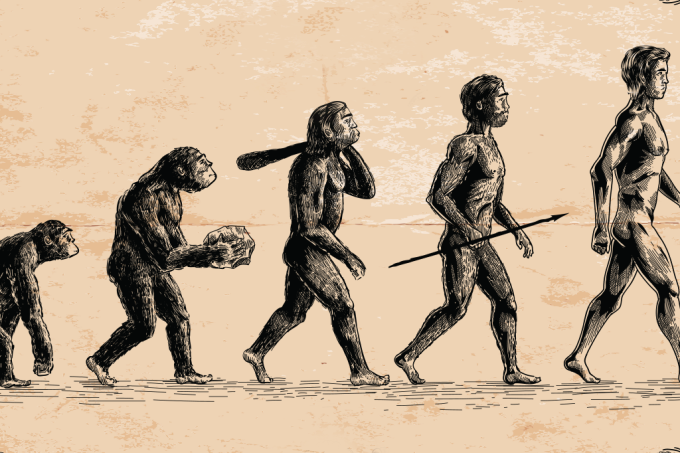

Fonte: https://super.abril.com.br/ciencia/estudo-mostra-as-tendencias-da-evolucao-humana/

Entretanto, é difícil estabelecer uma linearidade entre as espécies de hominídeos descrevendo a espécie "mais antiga" e, portanto, "geradora", e a espécie "mais recente" e, portanto, "gerada", uma vez que existiram espécies resultantes de um mesmo ancestral comum, como é o caso do *Homo sapiens* (espécie humana) e do *Homo neanderthalensis* (neandertais) que coexistiram por aproximadamente 5.4 mil anos (https://veja.abril.com.br/ciencia/neandertais-coexistiram-com-os-humanos-na-europa-por-ate-54-mil-anos/).

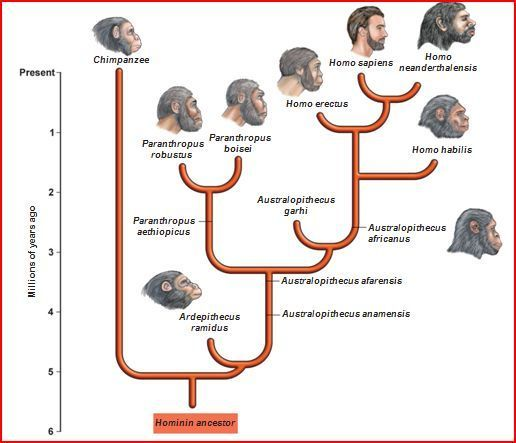

Fonte: https://i.pinimg.com/originals/38/83/ae/3883ae59ddeba67b85aa1734fa58c233.jpg

Para modelar este tipo de problema, é comum a utilização de estruturas de dados hierárquicas conhecidas como **árvores**. Que são estruturas de dados não lineares que relacionam um conjunto de elementos de acordo com níveis de precedência e procedência, sendo possível que muitos elementos estejam no mesmo nível.

# Conceitos Básicos

Uma estrutura do tipo ***árvore*** pode ser definida de forma recursiva, como destacado na sequência:

**Definição 1 (<font color='blue'>recursiva</font>)**: Uma árvore $T$ é um conjunto de $n\in \mathbb{N}$ elementos, cujos elementos são denominados **nós** ou **vértices**, tal que:

- $T = \{\}$. Neste caso, dizemos que $T$ é uma **árvore vazia**.

- Existe um nó especial $v$, denominado **raíz** de $T$, entre os elementos de $T$. Os demais elementos de $T$ se relacionam (conectam) com $v$ de forma que estes $n-1$ elementos formam uma árvore vazia, no caso de $n=1$, ou formam até $n-1$ árvores (ou **subárvores** de $T$).



**Definição 2**: Um conjunto de árvores é chamado de **floresta**.

**Importante**: Pode-se representar uma estrutura de dados do tipo árvore de várias formas diferentes. A saber:

- (1) Representação de inclusão e continência de conjuntos: Neste diagrama, os elementos do conjunto que representa a árvore são associados a conjuntos e os relacionamentos entre tais elementos são representados pela sua respectiva continência. Isto é, neste diagrama, se $B$ é uma subárvore de $A$ e $a\in A - B$ e $b \in B$, então $b$ está contido em $a$.

exemplo_inclusao.svg



- (2) Representação hierárquica: Nesta esquematização, as raízes de cada árvore / subárvore são representadas por estruturas de destaque (círculos, pontos, quadrados, etc) e os relacionamentos são representados por meio de ligações (segmentos de retas) nas raízes de suas subárvores.

exemplo_arvore.svg



- (3) Representação por barras: Neste diagrama, os elementos da árvore são dispostos verticalmente e, ao lado direito de cada nó, é apresentado um segmento de reta (ou uma barra). Neste sentido, se $B$ é uma subárvore de $A$ e $a\in A - B$ e $b \in B$, então $a$ deve estar disposto acima de $b$, e o segmento de reta associado a $a$ deve ser maior e estar mais à esquerda que o segmento de reta associado a $b$.

exemplo_barras.svg



- (4) Representação por parêntesis aninhados (lista): Neste caso, a árvore é representada por uma sequência de parêntesis balanceados e aninhados. Isto é, se for construída uma sequência literal $s = s_1,s_2,...,s_{2n}$, com $s_i \in \{'(', ')'\} \forall i$, então essa sequência é balanceada e aninhada se, para todo $i<2n$, o número de elementos $s_j$ iguais a $'('$, $i\leq j \leq 2n$, deve ser menor ao número de elementos  $s_j$ iguais a $')'$. Além disso, se $B$ é uma subárvore de $A$ e $a\in A - B$ e $b \in B$ então $b$ deve estar inserido junto a um parêntesis interno ao elemento $a$.

$$(a (b (g) ) (c (e) (f)) (d (h) (i)))$$

In [ ]:
['a', ['b', ['g']], ['c', ['e'], ['f']], ['d', ['h'], ['i']]]

['a', ['b', ['g']], ['c', ['e'], ['f']], ['d', ['h'], ['i']]]

### Componentes de árvores

**Definição 3 (<font color='green'>graus de parentesco</font>)**: Seja $T_v$ uma subárvore de $T$ cuja raíz é o vértice $v$. Sejam $T_{w_1}, T_{w_2}, ..., T_{w_m}$ subárvores de $T$ com raízes, respectivamente, iguais a $w_1, w_2, ..., w_m$. Neste caso, diz-se que:

- (1) O vértice $v$ é ***pai*** dos vértices $w_1, w_2, ..., w_m$;
- (2) Os vértices $w_1, w_2, ..., w_m$ são ***filhos*** do vértice $v$;
- (3) Os vértices $w_1, w_2, ..., w_m$ são ***irmãos*** entre si;
- (4) Se $T_u$ é uma subárvore de raíz $u$ de alguma subárvore $T_{w_i}$, então $u$ é ***neto*** de $v$ e $v$ é ***avô*** de $u$;
- (5) Se $T_r$ é uma subárvore de raíz $r$ de alguma subárvore $T_{w_i}$ e $T_s$ é uma subárvore de raíz $s$ de alguma subárvore $T_{w_j}$, com $i\neq j$, então os vértices $r$ e $s$ são ***primos***. Além disso, $r$ é ***sobrinho*** de $w_i$ e $s$ é ***sobrinho*** de $w_j$.
- (6) Seja $w$ um vértice de alguma subárvore de $v$. Então, $w$ é um ***descendente*** de $v$.

Na figura da sequência, é apresentada uma esquematização com a representação de cada grau de parentesco entre os nós.

parentesco.svg

**Definição 4 (<font color='purple'>Componentes de uma árvore</font>)**: Seja $T$ uma árvore.

- (1) Se $u$ é um vértice de $T$ que não possui nenhum vértice filho, então, $u$ é um vértice ***folha***.
- (2) Todo vértice de $T$ que não for um vértice folha é chamado de vértice ***interior***.
- (3) Seja a sequência $S = (v_1,v_2,...,v_k)$ de vértices de $T$ tais que $v_i$ é pai de $v_{i+1}$ para todo $1\leq i \leq k-1$. Neste caso, diz-se que a sequência $S$ é um ***caminho*** em $T$. Além disso, diz-se que $v_1$ ***alcança*** $v_k$ em $k-1$ passos (conecções). Ainda, diz-se que o ***comprimento*** do caminho $S$ é $k$ e que a ***distância*** de $v_1$ para $v_k$ é $k$.
- (4) O ***nível*** de um vértice $u$ de uma árvore $T$ é o comprimento do caminho entre este vértice e a raíz de $T$.
- (5) Ao maior nível existente entre todos os níveis de vértices de uma árvore dá-se o nome de ***altura*** da árvore.

**Importante**: De forma equivalente, é possível definir o nível de um vértice com base no número de arestas entre o vértice e a raíz. Nesse caso, o nível da raíz seria igual a 0.

Estes componentes são exemplificados na figura a seguir.

propriedades_arvores.svg

**Propriedade 1**: A raíz de uma árvore não vazia é o único vértice sem pai.

**Propriedade 2**: Uma subárvore não vazia é o conjunto de vértices e conecções composto por um pai e todos os seus descendentes.



**Importante**: Neste texto, vamos considerar que as árvores sejam ordenadas. Isto é, a posição relativa de seus vértices compõe sua definição. Especificamente, considera-se a ordenação da esquerda para a direita. Esta prática é importante para constornar a mal definição da estrutura no sentido do isomorfismo de grafos. Sendo assim, a árvore $(a (b) (c))$ é diferente da árvore $(a (c) (b))$.

# Árvores Binárias

Existe uma categoria especial da estrutura de dados do tipo árvore na qual todos os vértices possuem, no máximo, dois filhos. Nesse caso, a estrutra de dados é razoavelmente mais simplificada que a forma geral e permite implementações computacionais sistematizadas e intuitivas. Na sequência, esta categoria de árvores é matematicamente definida.

**Definição 3 (<font color='blue'>Árvore Binária</font>)**: A estrutura $T$ é uma ***árvore binária*** definida por um conjunto finito de $n$ elementos se, e somente se:

- $T = \{\}$ é uma árvore vazia ($n=0$);
- $T~$ possui um vértice especial $v$, intitulado raíz, que se relaciona (conecta) com duas árvores $T_v^E$ e $T_v^D$ chamadas, respectivamente, de ***subárvore à esquerda*** e ***subárvore à direita*** de $v$, as quais também são árvores binárias.

Na figura a seguir é dado um exemplo de árvore binária.

arvore_bin.svg

**Propriedade 3**: Todo vértice de uma árvore binária possui, no máximo, 2 filhos.


**Propriedade 4**: Se $T$ é uma árvore binária de $n$ elementos, então existem $n+1$ subárvores vazias relacionadas com seus elementos.

*Demonstração*: É conduzida por princípio de indução finita sobre o número de vértices.

**Definição 4 (<font color='blue'>Categorias de Árvores Binárias</font>)**: Seja $T$ uma árvore binária.

- Se nenhum vértice de $T$ possui exatamente $1$ filho, então $T$ é dita ser uma árvore ***estritamente binária***.
- Diz-se que $T$ é uma árvore ***binária completa*** se os únicos vértices com menos de dois filhos estão localizados nos dois últimos níveis da árvore.
- $T$ é uma árvore ***binária cheia*** se, e somente se, todos os vértices com uma ou mais subárvores vazias estão localizados no último nível.
- Se todos os vértices interiores de $T$ possuem exatamente 1 filho, então $T$ é uma árvore binária **ziguezague**.

**Propriedade 5**: Se $T$ é uma árvore estritamente binária, então todos os seus vértices possuem duas subárvores não vazias ou possuem ambas as subárvores vazias.

**Propriedade 6**: Se $v$ é um vértice de uma árvore binária cheia, então $v$ possui 2 filhos ou $v$ não possui nenhum filho. Além disso, se $v$ não possui nenhum filho, $v$ está no último nível da árvore.

**Propriedade 7**: Toda árvore do tipo ziguezague de $n$ vértices, possui altura exatamente igual a $n$.

**Propriedade 8**: Seja a árvore $\mathcal{T}$ tal que

$$\mathcal{T} := \text{argmax}_{T \text{ é uma árvore de } n \text{ vértices}}\{ \text{altura\{T\}}\}.$$

Então $\mathcal{T}$ é uma árvore ziguezague.

Na sequência, são apresentados alguns exemplos dessas árvores.

tipos_de_arvores_binarias.svg

ziguezague.svg

**Propriedade 9**: Se $T$ é uma árvore binária cheia de $n$ vértices, então $n = 2^m - 1$, para $m$ sendo a altura da árvore.

*Demonstração*: A cada nível de uma árvore binária cheia, cada pai gera 2 filhos. Então:
- no nível 1, existe apenas um vértice, que é a raíz da árvore;
- no nível 2, existem 2 vértices;
- no nível 3, existem 4 vértices;
- ...
- no nível m, existem $2^{m-1}$ vértices;

Finalmente, existem $\sum_{i=1}^m 2^i$ vértices na árvore. Entretanto, como esta soma se trata de uma soma de $m$ termos de uma progressão geométrica de razão 2 e primeiro termo 1, então tem-se que a árvore possui exatos $\frac{1(2^{m}-1)}{2-1} = 2^{m} - 1$ vértices.

**Propriedade 10**: Se $T$ é uma árvore binária completa de $n$ vértices, então $2^{m-1} \leq n \leq 2^m - 1$, para $m$ sendo a altura da árvore.

*Demonstração*: Análoga à demonstração da propriedade acima.

**Propriedade 11**: A altura de uma árvore binária cheia de $n$ vértices é $⌊\log_2(n)⌋ + 1$.

*Demonstração*: Consequência direta da propriedade 9.

## Representação computacional (POO)

Há muitas maneiras de representar e tratar estruturas de dados do tipo árvore binária. De posse da representação em parêntesis aninhados, percebe-se que uma modelagem por meio de listas é possível e muito natural. Entretanto, esta de modelagem é muito limitada. Uma representação que faz uso das boas propriedades da Programação Orientada a Objetos (POO) é muito mais indicada para essa estrutura de dados.

Assim, somente é necessário, definir os atributos e métodos que compõem uma árvore binária. Com respeito aos atributos, de acordo com a definição, uma árvore é uma estrutura representada por um vértice, e seu conteúdo, e duas subárvores: uma à direita e outra à esquerda. Com respeito aos métodos, são necessárias rotinas de atualização de vértices, ou seja, adição e remoção de nós. Na sequência, apresentam-se alguns dos métodos que uma classe que represente uma árvore binária deve possuir.

---

- **set_raiz**: Método para definir a raíz de uma árvore. Isto é, deve ser estabelecido o endereço de memória de seu vértice.
- **get_raiz**: Método que deve retornar o endereço de memória da raíz de uma árvore.
- **set_valor_da_raiz**: Método define o conteúdo de uma raíz.
- **get_valor_da_raiz**: Método que deve retornar o conteúdo de uma raíz.
- **adiciona_vertice_a_esquerda**: Método para inserir um vértice à esquerda de uma raíz.
- **adiciona_vertice_a_direita**: Método para inserir um vértice à direita de uma raíz.
- **get_arvore_a_esquerda**: Método que retorna a subárvore à esquerda de uma raíz.
- **get_arvore_a_direita**: Método que retorna a subárvore à direita de uma raíz.
- **faz_poda_a_esquerda**: Método que deleta a raíz da subárvore à esquerda à raíz. Isto é, que anula seu endereço de memória, removendo também seus descendentes.
- **faz_poda_a_direita**: Método que deleta a raíz da subárvore à direita à raíz. Isto é, que anula seu endereço de memória, removendo também seus descendentes.
---

A seguir, uma esquematização de atualização de vértices de uma árvore binária é apresentada.

add_del_vertices_arvore_binaria.svg


A seguir, apresenta-se um protótipo de uma classe de árvore binária.

In [ ]:
class Arvore_Binaria:
  __conteudo = ''
  __arvore_a_esquerda = None
  __arvore_a_direita  = None

  def __init__(self, conteudo):
    self.set_conteudo(conteudo)

  def adiciona_vertice_a_esquerda(self, conteudo):
    # Se a árvore à esquerda for vazia, então crie uma nova árvore.
    if self.get_arvore_a_esquerda() == None:
      self.__arvore_a_esquerda = Arvore_Binaria(conteudo)
    else: # Senão, insira o vértice à esquerda da raíz e faz um enxerto com a
          # subárvore à esquerda já existente.
      temp = Arvore_Binaria(conteudo)
      temp.__arvore_a_esquerda = self.get_arvore_a_esquerda()
      self.__arvore_a_esquerda = temp

  def get_arvore_a_esquerda(self):
    return self.__arvore_a_esquerda

  def adiciona_vertice_a_direita(self, conteudo):
    # Se a árvore à direita for vazia, então crie uma nova árvore.
    if self.get_arvore_a_direita() == None:
      self.__arvore_a_direita = Arvore_Binaria(conteudo)
    else: # Senão, insira o vértice à direita da raíz e faz um enxerto com a
          # subárvore à direita já existente.
      temp = Arvore_Binaria(conteudo)
      temp.__arvore_a_direita = self.get_arvore_a_direita()
      self.__arvore_a_direita = temp

  def get_arvore_a_direita(self):
    return self.__arvore_a_direita

  def faz_poda_a_direita(self):
    self.__arvore_a_direita = None

  def faz_poda_a_esquerda(self):
    self.__arvore_a_esquerda = None

  def set_conteudo(self, conteudo):
    self.__conteudo = conteudo

  def get_conteudo(self):
    return self.__conteudo

Vamos tentar simular as atualizações de uma árvore de acordo com a última imagem acima.

In [ ]:
# Crie a árvore
raiz = Arvore_Binaria('a')

print("Conteúdo da raíz: ", raiz.get_conteudo())

Conteúdo da raíz:  a


In [ ]:
# Adiciona um vértice com conteúdo 'b' à esquerda da raíz.

raiz.adiciona_vertice_a_esquerda('b')

print("Conteúdo da raíz da árvore à esquerda de 'a': ", raiz.get_arvore_a_esquerda().get_conteudo())

Conteúdo da raíz da árvore à esquerda de 'a':  b


In [ ]:
# Adiciona um vértice com conteúdo 'c' à direita da raíz.

raiz.adiciona_vertice_a_direita('c')

print("Conteúdo da raíz da árvore à direita de 'a': ", raiz.get_arvore_a_direita().get_conteudo())
print("Conteúdo da  árvore : ", raiz.get_conteudo())

Conteúdo da raíz da árvore à direita de 'a':  c
Conteúdo da  árvore :  a


In [ ]:
# Adiciona um vértice com conteúdo 'd' à direita da raíz da subárvore à esquerda
# de 'a': adiciona 'd' à direita de 'b'.

vertice_b = raiz.get_arvore_a_esquerda()

vertice_b.adiciona_vertice_a_direita('d')

print("Vértice à direita de 'b':", vertice_b.get_arvore_a_direita().get_conteudo())

Vértice à direita de 'b': d


In [ ]:
# Adiciona um vértice com conteúdo 'e' à direita da raíz da subárvore à esquerda
# de 'a': adiciona 'e' à direita de 'b' <=> adiciona 'e' entre 'b' e 'd'.

vertice_b = raiz.get_arvore_a_esquerda()

vertice_b.adiciona_vertice_a_direita('e')

print("Vértice à direita de 'b':", vertice_b.get_arvore_a_direita().get_conteudo())
print("Vértice à direita de 'e':", vertice_b.get_arvore_a_direita().get_arvore_a_direita().get_conteudo())

Vértice à direita de 'b': e
Vértice à direita de 'e': d


In [ ]:
# Remove o vértice 'b'. Isso é, faz uma poda à esquerda da raíz 'a'.

raiz.faz_poda_a_esquerda()

In [ ]:
# Ao tentar acessar a árvore à esquerda de 'a', obtém-se 'None'. Isto é, a
# subárvore à esquerda de 'a' é vazia. Implicando que 'b' encontra-se
# inacessível e, consequentemente, seus descendentes também.

vertice_b = raiz.get_arvore_a_esquerda()
print(vertice_b)

None


## Percursos

Diferentemente ao que faz-se com listas lineares (listas, pilhas, filas, etc), uma árvore não possui uma ordem natural entre seus elementos. Mesmo que a raíz de uma árvore com $n>1$ vértices seja considerada 'o primeiro vértice', não é possível definir de maneira única um sequenciamento que tenha início pela raíz e que seja finalizado em um dos demais vértices. Assim sendo, existem várias maneiras de se conduzir uma varredura sobre os vértices de uma árvore, iniciando-se da raíz e finalizando-se em um vértice folha. A estas estratégias de varredura dá-se o nome de ***percurso***, sendo as mais conhecidas as seguintes: **pre-order**, **inorder** e **postorder**, as quais podem ser definidas recursivamente, como apresentado na sequência.

- Percurso **Pre-order**: nesta estratégia, primeiro anota-se o valor do vértice e, na sequência, dá prosseguimento à varredura começando pela esquerda e seguindo pela direita: avalia-se o valor do vértice *antes* (pré) de determinar a ordem. Assim, a varredura de acordo com o percurso pre-order em uma árvore $T$ é feita de acordo com o seguinte roteiro:
  - Visita-se a raíz da árvore;
  - Conduz-se o mesmo percurso à subárvore à esquerda;
  - Conduz-se o mesmo percurso à subárvore à direita;

pré-ordem.svg

- Percurso **Inorder** (**ordem simétrica**): nesta estratégia, inicia-se o percurso seguindo-se a ordem de análise das árvores à esquerda. Caso não haja árvore à esquerda do vértice, analisa-se o valor deste vértice. Na sequência, faz-se o mesmo com as árvores à direita. Assim, a varredura em ordem simétrica em uma árvore $T$ é feita de acordo com o seguinte roteiro:
  - Conduz-se o percurso inorder à subárvore à esquerda;
  - Visita-se a raíz da árvore;
  - Conduz-se o percurso inorder à subárvore à direita;

inorder.svg

- Percurso **Post-order**: nesta estratégia, inicia-se o percurso definindo a ordem de varredura, da esquerda para a direita, para, na sequência, avaliar o valor dos vértices. Deste modo, a avaliação é feita após a definição da ordem. Assim, a varredura em post-order de uma árvore $T$ é feita de acordo com o seguinte roteiro:
  - Conduz-se o percurso pós-ordem à subárvore à esquerda;
  - Conduz-se o percurso pós-ordem à subárvore à direita;
  - Visita-se a raíz da árvore;

post_order.svg

Na sequência, acrescentam-se os códigos dessas varreduras na classe-protótipo de uma árvore binária.

In [ ]:
class Arvore_Binaria:
  __conteudo = ''
  __arvore_a_esquerda = None
  __arvore_a_direita  = None

  def __init__(self, conteudo):
    self.set_conteudo(conteudo)

  def percurso_pre_order(self, elementos_visitados = []):

    # visita
    elementos_visitados.append(self.get_conteudo())

    # vai para a árvore da esquerda
    if self.__arvore_a_esquerda is not None:
      self.__arvore_a_esquerda.percurso_pre_order(elementos_visitados)

    # vai para a árvore da direita
    if self.__arvore_a_direita is not None:
      self.__arvore_a_direita.percurso_pre_order(elementos_visitados)

    return elementos_visitados



  def percurso_in_order(self, elementos_visitados = []):

    # vai para a árvore da esquerda
    if self.__arvore_a_esquerda is not None:
      self.__arvore_a_esquerda.percurso_in_order(elementos_visitados)

    # visita
    elementos_visitados.append(self.get_conteudo())

    # vai para a árvore da direita
    if self.__arvore_a_direita is not None:
      self.__arvore_a_direita.percurso_in_order(elementos_visitados)

    return elementos_visitados


  def percurso_post_order(self, elementos_visitados = []):

    # vai para a árvore da esquerda
    if self.__arvore_a_esquerda is not None:
      self.__arvore_a_esquerda.percurso_post_order(elementos_visitados)

    # vai para a árvore da direita
    if self.__arvore_a_direita is not None:
      self.__arvore_a_direita.percurso_post_order(elementos_visitados)

    # visita
    elementos_visitados.append(self.get_conteudo())

    return elementos_visitados


  def adiciona_vertice_a_esquerda(self, conteudo):
    # Se a árvore à esquerda for vazia, então crie uma nova árvore.
    if self.get_arvore_a_esquerda() == None:
      self.__arvore_a_esquerda = Arvore_Binaria(conteudo)
    else: # Senão, insira o vértice à esquerda da raíz e faz um enxerto com a
          # subárvore à esquerda já existente.
      temp = Arvore_Binaria(conteudo)
      temp.__arvore_a_esquerda = self.get_arvore_a_esquerda()
      self.__arvore_a_esquerda = temp

  def get_arvore_a_esquerda(self):
    return self.__arvore_a_esquerda

  def adiciona_vertice_a_direita(self, conteudo):
    # Se a árvore à direita for vazia, então crie uma nova árvore.
    if self.get_arvore_a_direita() == None:
      self.__arvore_a_direita = Arvore_Binaria(conteudo)
    else: # Senão, insira o vértice à direita da raíz e faz um enxerto com a
          # subárvore à direita já existente.
      temp = Arvore_Binaria(conteudo)
      temp.__arvore_a_direita = self.get_arvore_a_direita()
      self.__arvore_a_direita = temp

  def get_arvore_a_direita(self):
    return self.__arvore_a_direita

  def faz_poda_a_direita(self):
    self.__arvore_a_direita = None

  def faz_poda_a_esquerda(self):
    self.__arvore_a_esquerda = None

  def set_conteudo(self, conteudo):
    self.__conteudo = conteudo

  def get_conteudo(self):
    return self.__conteudo

A análise será conduzida sobre a árvore da imagem utilizada como exemplo da definição dos três percursos abordados.

In [ ]:
raiz = Arvore_Binaria('a')

raiz.adiciona_vertice_a_esquerda('b')
raiz.adiciona_vertice_a_direita('c')

vertice_b = raiz.get_arvore_a_esquerda()
vertice_b.adiciona_vertice_a_esquerda('d')
vertice_b.adiciona_vertice_a_direita('e')

In [ ]:
roteiro = raiz.percurso_pre_order()
print('Preorder: ', roteiro)

roteiro = raiz.percurso_in_order()
print('Inorder: ', roteiro)

roteiro = raiz.percurso_post_order()
print('Preorder: ', roteiro)

Preorder:  ['a', 'b', 'd', 'e', 'c']
Inorder:  ['d', 'b', 'e', 'a', 'c']
Preorder:  ['d', 'e', 'b', 'c', 'a']


# Árvores binárias de busca

Vale ressaltar que, se existir o objetivo de conduzir uma busca de um elemento específico em uma árvore, é necessário definir-se um percurso e seguí-lo até encontrar tal elemento. Se o percurso escolhido, for um dos três percursos listados anteriormente, então, no caso de o elemento não existir ou no caso de o elemento for o último a ser visitado, serão necessárias $n$ verificações, sendo $n$ o número de vértices na árvore. Entretanto, com um ajuste na definição de árvore binária, é possível reduzir a complexidade dessa busca para a ordem da altura da árvore. Assim, se a árvore a ser percorrida for uma árvore cheia, então serão necessárias $⌊\log_2(n)⌋+1$ verificações, o que reduz a complexidade da busca para $\mathcal{O}(\log_2(n)).$

**Definição 5 (<font color='green'>Árvores binárias de busca</font>)**: Seja $S = \{s_1,s_2,...,s_n\}$ um conjunto de chaves numéricas tais que $s_1<s_2<...<s_n$; e $T$ uma árvore binária com $n$ vértices $\{v_1,v_2,...,v_n\}$. A cada vértice de $T$ é associada uma chave de $S$ por meio da função $r:T\to S$. No caso, sem perda de generalidade, supõe-se que $r(v_i) = s_i, ∀ i$. Assim, a raíz de cada subárvore de $T$ é associada a um valor numérico de $S$. Finalmente, diz-se que $T$ é uma ***árvore binária de busca*** se, e somente se, para todo vértice $v$ de $T$ tem-se:

(i) A subárvore à esquerda de $v$ é vazia ou, no caso da subárvore à esquerda de $v$ não ser vazia, considera-se $v_e$ como sendo a raíz dessa subárvore. Nesse caso, $r(v_e) < r(v)$.

(ii) A subárvore à direita de $v$ é vazia ou, no caso da subárvore à direita de $v$ não ser vazia, considera-se $v_d$ como sendo a raíz dessa subárvore. Nesse caso, $r(v) < r(v_d)$.

Por exemplo, considere o conjunto de chaves $S = \{1,3,4,5,6,7,9\}$ e a árvore $T$ representada na figura a seguir. É fato que a árvore em questão satisfaz a definição 5.

ex_arvorebinariabusca.svg

Entretanto, no exemplo abaixo, a associação feita aos elementos de $S$ não satisfaz uma árvore binária de busca, pois as subárvores associadas ao vértice que representa a chave 6 não seguem a definição 5, uma vez que a raíz da subárvore à direita do vértice 6 é 1 e 1 é menor que 6. Além disso, a subárvore à esquerda do vértice 6 possui raíz que representa 9 o que também está em desacordo aoe stabelecido na definição.

ex_arvorebinariabusca_falsa.svg

**Importante**: Um requisito importante a conjuntos de chaves é que todos os elementos devem ser distintos entre si. Então um conjunto com repetições não pode ser representado por uma árvore binária de busca.

Por construção, as árvores binárias de busca possuem algumas propriedades interessantes, como descrito na sequência.

**Propriedade 12:** O vértice que representa a chave de maior valor em uma árvore binária de busca é um vértice folha ou é um vértice com apenas um filho e este está à esquerda.

**Propriedade 13:** Suponha $T$ uma árvore binária de busca e $(v_1,v_2,...,v_k)$ vértices de $T$ tais que:

(i) $v_{i+1}$ é raíz da subárvore à esquerda de $v_i$, $\forall i$. Então, $r(v_k) < r(v_j)$ se, e somente se, $k > j$.

(i) $v_{i+1}$ é raíz da subárvore à direita de $v_i$, $\forall i$. Então, $r(v_k) < r(v_j)$ se, e somente se, $k < j$.

**Propriedade 14:** Se a raíz de uma (sub)árvore nunca for alterada, então a condução de um percurso inorder (esquerda -> visita -> direita) resulta em uma visitação ordenada do menor para o maior valor das chaves de uma árvore binária de busca.

**Propriedade 15**: Se um vértice $v$ possui dois filhos, então existe um vértice $w$ na árvore binária de busca no qual $r(w) < r(v)$. Além disso, o vértice $w$, com $r(w) < r(v)$, tal que $||r(w) - r(v)||$ seja mínima possui no máximo 1 filho.

*Demonstração*: O vértice $w$ é o vértice mais à direita da subárvore à esquerda de $v$. Nesse caso, ou $w$ é um nó folha ou possui apenas um filho, que é sua subárvore à esquerda.

**Definição 6**: Ao vértice $w$ da propriedade 15 dá-se o nome de ***sucessor*** de $v$.

## Adição e remoção de vértices: representação computacional em POO

Cada vértice de uma árvore binária de busca deve armazenar as seguintes informações:

- A chave que o vértice representa. Isto é, um valor numérico.

- A raíz (endereço) de sua subárvore à esquerda.

- A raíz (endereço) de sua subárvore à direita.

- O endereço de seu pai na árvore. (Esta informação será útil na remoção de elementos da árvore).

Este componente está representado na figura a seguir.

vertice.svg

Assim, um protótipo dessa configuração pode ser obtido pela classe `Vertice` da sequência.

In [ ]:
class Vertice:
  # Atributos ------------------------------------------------------------------
  __pai               = None
  __filho_a_esquerda  = None
  __filho_a_direita   = None
  __chave             = 0
  # ----------------------------------------------------------------------------

  # Construtor -----------------------------------------------------------------
  def __init__(self, chave, pai = None, filho_esquerda = None, filho_direita = None):
    self.set_pai(pai)
    self.set_filho_esquerda(filho_esquerda)
    self.set_filho_direita(filho_direita)
    self.set_chave(chave)
  # ----------------------------------------------------------------------------

  # Métodos de configuração ----------------------------------------------------
  def set_pai(self, pai):
    self.__pai = pai

  def set_filho_esquerda(self, filho_esquerda):
    self.__filho_a_esquerda = filho_esquerda

  def set_filho_direita(self, filho_direita):
    self.__filho_a_direita = filho_direita

  def set_chave(self, chave):
    self.__chave = chave
  # ----------------------------------------------------------------------------

  # Métodos de retorno ---------------------------------------------------------
  def get_pai(self):
    return self.__pai

  def get_filho_esquerda(self):
    return self.__filho_a_esquerda

  def get_filho_direita(self):
    return self.__filho_a_direita

  def get_chave(self):
    return self.__chave
  # ----------------------------------------------------------------------------

Para representar uma árvore binária de busca, algumas modificações na classe `Arvore_Binaria` devem ser implementadas. principalmente no sentido de incluir e remover vértices da árvore, uma vez que a condição das chaves deve ser mantida nessas atualizações. Desse modo, diferentemente de uma árvore binária padrão, a **inclusão** não deve ser feita de forma livre, escolhendo-se o vértice durante o uso do objeto, mas sim de forma controlada, de modo a garantir que o novo vértice seja alocado na árvore de forma que, se sua chave for maior que a chave de seu pai, então sua alocação será em uma subárvore à direita e, se sua chave for menor que a chave de seu pai, então sua alocação será em uma subárvore à esquerda. Esse procedimento deve ser recursivamente repetido até que uma subárvore vazia seja encontrada. Como apresentado na esquematização a seguir.

insercao_arvore_binaria_de_busca.svg

Com respeito à remoção de vértices de uma árvore binária de busca, deve-se considerar 3 casos para a remoção de raizes de subárvores à esquerda e 3 casos para a remoção de raizes de subárvores à direita. No caso, serão esquematizados os casos referentes à remoção conduzida às raizes de subárvores à direita, uma vez que o método é análogo para os demais casos.

**Caso 1** (Remoção de vértices folhas): Este é o caso mais simplificado. Sendo que, é necessário buscar pelo vértice que representa a chave a ser removida e corrigir o apontamento de seu vértice pai, fazendo com que o mesmo aponte para o vazio.

arvbinbusca_remocao_de_folha.svg

**Caso 2** (Remoção de vértices com apenas 1 filho): No caso do vértice a ser removido tiver apenas uma subárvore (tanto à esquerda quanto à direita), então basta fazer com que este filho ocupe o seu lugar na árvore. Isto é, se o vértice a ser removido for uma raíz, então seu único filho se tornará a raíz da árvore. Agora, se o vértice a ser removido não for uma raíz, então, este vértice deve ser a raíz da subárvore à esquerda ou a raíz da subárvore à direita de seu pai. Nesse caso, seu único filho se tornará a raíz dessa subárvore. Na sequência, segue uma esquematização desse processo.

arvbinbusca_remocao_de_vertice_com_filho_unico.svg

**Importante**: Este processo é validado pela **propriedade 13**, a qual garante que todos os filhos das subárvores à esquerda de um vértice representam chaves menores que a do próprio vértice. Ao mesmo tempo, todos os filhos das subárvores à direita de um vértice representam chaves maiores que a chave do próprio vértice.

**Caso 3** (Remoção de vértices com dois filhos): Nesse caso, a remoção, na verdade, é uma substituição, pois substitui-se o vértice pelo seu sucessor, cuja existência é garantida pela **propriedade 15**. Desse modo, o processo de remover um vértice $v$ com dois filhos constitui-se de três passos principais: detectar o sucessor de $v$; remover o sucessor de $v$, o qual deve ter menos de dois filhos e, consequentemente, pode ser removido respeitando-se os casos 1 e 2 anteriores; na sequência, substituir $v$ por seu sucessor.

Na sequência, apresenta-se uma esquematização desse procedimento.

ABB_remocao_passo1.svg

ABB_remocao_passo2.svg

ABB_remocao_passo3.svg

Finalmente, um protótipo computacional na forma de uma classe que deve simular uma árvore binária de busca é dada na sequência.

In [ ]:
class Arvore_Binaria_de_Busca:

  # Atributos ------------------------------------------------------------------
  __raiz    = None # Endereço da raíz da árvore
  __tamanho = 0
  # ----------------------------------------------------------------------------

  # Construtor -----------------------------------------------------------------
  def __init__(self, raiz):
    self.set_raiz(raiz)
    if raiz is not None:
      self.add_tamanho()
  # ----------------------------------------------------------------------------


  # Demais métodos -------------------------------------------------------------

  # ----------------------------------------------------------------------------
  # Inserção de vértices
  # ----------------------------------------------------------------------------
  def insere_vertice(self, novo_vertice):

      if self.get_raiz() is None:
        self.set_raiz(novo_vertice)

      else:
        self.aux_insere(novo_vertice, self.get_raiz())

  # ----------------------------------------------------------------------------
  def aux_insere(self, novo_vertice, possivel_pai):
    chave = novo_vertice.get_chave()

    if possivel_pai.get_chave() < chave:

      filho_dir = possivel_pai.get_filho_direita()

      if filho_dir is not None:
        self.aux_insere(novo_vertice, filho_dir)
      else:
        possivel_pai.set_filho_direita(novo_vertice)
        novo_vertice.set_pai(possivel_pai)

    elif possivel_pai.get_chave() > chave:

      filho_esq = possivel_pai.get_filho_esquerda()

      if filho_esq is not None:
        self.aux_insere(novo_vertice, filho_esq)
      else:
        possivel_pai.set_filho_esquerda(novo_vertice)
        novo_vertice.set_pai(possivel_pai)

    else:
      print("Chave já existente na árvore!")

  # ----------------------------------------------------------------------------
  # Busca
  # ----------------------------------------------------------------------------

  def busca(self, chave):

      temp = self.get_raiz()

      while temp.get_chave() != chave and temp is not None:

        chave_temporaria = temp.get_chave()

        if chave < chave_temporaria:
          temp = temp.get_filho_esquerda()
        elif chave > chave_temporaria:
          temp = temp.get_filho_direita()
        else:
          break


      if temp is None:
        print("Essa chave não existe na árvore!")
      else:
        return temp

  # ----------------------------------------------------------------------------
  # Remoção
  # ----------------------------------------------------------------------------
  # Analisa todos os casos para a remoção de um vértice: o caso do vértice ser
  # uma folha; o caso do vértice ter um filho único; e o caso do vértice ter
  # dois filhos.
  def remove_vertice(self, chave_a_ser_removida):

      temp = self.get_raiz()

      while temp.get_chave() != chave_a_ser_removida and temp is not None:

        chave_temporaria = temp.get_chave()

        if chave_a_ser_removida < chave_temporaria:
          temp = temp.get_filho_esquerda()
        elif chave_a_ser_removida > chave_temporaria:
          temp = temp.get_filho_direita()
        else:
          break


      if temp is None:
        print("Essa chave já não existe na árvore!")
      else:
        self.analisa_casos_de_remocao(temp)
        self.sub_tamanho()
  # ----------------------------------------------------------------------------

  # Uma vez que o vértice foi detectado, vamos considerar os casos para
  # removê-lo
  def analisa_casos_de_remocao(self, vertice_a_ser_removido):

      filho_esq = vertice_a_ser_removido.get_filho_esquerda()
      filho_dir = vertice_a_ser_removido.get_filho_direita()
      pai       = vertice_a_ser_removido.get_pai()

      # Se o vértice a ser removido for um vértice folha então basta anulá-lo.
      if filho_esq is None and filho_dir is None:
        self.caso_sem_filhos(vertice_a_ser_removido, pai)
      elif filho_esq is not None and filho_dir is not None:
        self.caso_filho_duplo(vertice_a_ser_removido, filho_esq, filho_dir, pai)
      else:
        self.caso_filho_unico(vertice_a_ser_removido, filho_esq, filho_dir, pai)
  # ----------------------------------------------------------------------------

  # Caso o vértice a ser removido seja um nó folha.
  def caso_sem_filhos(self, vertice_a_ser_removido, pai):
      if pai is not None:
        if pai.get_filho_direita().get_chave() == vertice_a_ser_removido.get_chave():
          pai.set_filho_direita(None)
        else:
          pai.set_filho_esquerda(None)

      vertice_a_ser_removido = None
  # ----------------------------------------------------------------------------

  # Caso o vértice a ser removido tenha apenas um filho
  def caso_filho_unico(self, vertice_a_ser_removido, filho_esq, filho_dir, pai):
    # O pai do vértice deve apontar para o filho do vértice.

    # Vamos descobrir onde está o filho do vértice (esquerda ou direita)
    if filho_dir is not None:
      filho = filho_dir
    elif filho_esq is not None:
      filho = filho_esq
    else:
      raise KeyError("Ambos os filhos de um vértice com 1 filho são nulos.")

    # Primeiramente, define-se o pai do vértice a ser removido como o novo pai
    # de seu filho.
    filho.set_pai(pai)

    # Se o vértice for a raíz, então ele não tem pai e, portanto, seu filho deve
    # se tornar a nova raíz.
    if pai is None:
      self.set_raiz(None)
      self.set_raiz(filho)
    else:

      # O vértice a ser removido é filho à direita ou a esquerda do pai?
      # Se for à direita, então seu filho deve ser apontado à direita pelo pai.
      if vertice_a_ser_removido.get_chave() == pai.get_filho_direita().get_chave():
        pai.set_filho_direita(filho)
      else:
      # Se for à esquerda, então seu filho deve ser apontado à esquerda pelo pai.
        pai.set_filho_esquerda(filho)
  # ----------------------------------------------------------------------------

  # Método para fazer a varredura à parte mais à direita da subárvore à esquerda
  # do ponto a ser removido. A este ponto dá-se o nome de sucessor do vértice
  # a ser removido.
  def detecta_sucessor(self, vertice):
    sucessor = vertice.get_filho_esquerda()
    filho_a_direita_do_possivel_sucessor = sucessor.get_filho_direita()

    while filho_a_direita_do_possivel_sucessor is not None:
      sucessor = filho_a_direita_do_possivel_sucessor
      filho_a_direita_do_possivel_sucessor = sucessor.get_filho_direita()

    return sucessor
  # ----------------------------------------------------------------------------

  # Método para deletar um vértice com dois filhos, sendo que, na verdade, neste
  # caso, não se faz uma remoção do vértice, mas sim sua substituição pelo seu
  # sucessor.
  def caso_filho_duplo(self, vertice_a_ser_removido, filho_esq, filho_dir, pai):

    # Primeiramente, detecta-se o sucesor do vértice.
    sucessor = self.detecta_sucessor(vertice_a_ser_removido)

    # Armazena o valor de sua chave.
    chave_sucessor = sucessor.get_chave()

    # Atualiza a chave do vértice a ser removido como sendo a chave do sucessor.
    vertice_a_ser_removido.set_chave(chave_sucessor)

    # Remove-se o sucessor do vértice da árvore.
    # Lembrando que o sucessor ou não tem filhos ou tem apenas 1 filho.
    if sucessor.get_filho_direita() is None and sucessor.get_filho_esquerda() is None:
      self.caso_sem_filhos(sucessor, sucessor.get_pai())
    else:
      self.caso_filho_unico(sucessor, sucessor.get_filho_esquerda(), sucessor.get_filho_direita(), sucessor.get_pai())
  # ----------------------------------------------------------------------------
  # ----------------------------------------------------------------------------


  # ----------------------------------------------------------------------------
  # Atualização do tamanho
  # ----------------------------------------------------------------------------
  def add_tamanho(self):
    self.__tamanho = self.__tamanho + 1

  def sub_tamanho(self):
    self.__tamanho = self.__tamanho - 1
  # ----------------------------------------------------------------------------


  # ----------------------------------------------------------------------------
  # Percursos
  # ----------------------------------------------------------------------------

  def percurso_pre_order(self, elementos_visitados = [], vertice = None):

    if vertice is None:
      vertice = self.get_raiz()
      elementos_visitados = []

    # visita
    elementos_visitados.append(vertice.get_chave())

    # vai para a árvore da esquerda
    if vertice.get_filho_esquerda() is not None:
      self.percurso_pre_order(elementos_visitados, vertice.get_filho_esquerda())

    # vai para a árvore da direita
    if vertice.get_filho_direita() is not None:
      self.percurso_pre_order(elementos_visitados, vertice.get_filho_direita())

    return elementos_visitados
  # ----------------------------------------------------------------------------



  def percurso_in_order(self, elementos_visitados = [], vertice = None):

    if vertice is None:
      vertice = self.get_raiz()
      elementos_visitados = []

    # vai para a árvore da esquerda
    if vertice.get_filho_esquerda() is not None:
      self.percurso_in_order(elementos_visitados, vertice.get_filho_esquerda())

    # visita
    elementos_visitados.append(vertice.get_chave())

    # vai para a árvore da direita
    if vertice.get_filho_direita() is not None:
      self.percurso_in_order(elementos_visitados, vertice.get_filho_direita())

    return elementos_visitados
  # ----------------------------------------------------------------------------


  def percurso_post_order(self, elementos_visitados = [], vertice = None):

    if vertice is None:
      vertice = self.get_raiz()
      elementos_visitados = []

    # vai para a árvore da esquerda
    if vertice.get_filho_esquerda() is not None:
      self.percurso_post_order(elementos_visitados, vertice.get_filho_esquerda())

    # vai para a árvore da direita
    if vertice.get_filho_direita() is not None:
      self.percurso_post_order(elementos_visitados, vertice.get_filho_direita())

    # visita
    elementos_visitados.append(vertice.get_chave())

    return elementos_visitados
  # ----------------------------------------------------------------------------
  # ----------------------------------------------------------------------------



  # Configuração ---------------------------------------------------------------
  def set_raiz(self, raiz):
    if self.__raiz is None or raiz is None:
      self.__raiz = raiz
    else:
      if raiz.get_chave() > self.__raiz.get_chave():
        raiz.set_filho_esquerda(self.__raiz)
      elif raiz.get_chave() < self.__raiz.get_chave():
        raiz.set_filho_direita(self.__raiz)

      self.__raiz.set_pai(raiz)

      self.__raiz = raiz
  # ----------------------------------------------------------------------------


  # Retorno --------------------------------------------------------------------
  def get_raiz(self):
    return self.__raiz
  # ----------------------------------------------------------------------------

Na sequência, a árvore exemplificada nas esquematizações de remoção de vértice com dois filhos é construída.

In [ ]:
ABB = Arvore_Binaria_de_Busca(None)

In [ ]:
vertice_raiz = Vertice(5)
ABB.insere_vertice(vertice_raiz)

print("Raíz da árvore: ", ABB.get_raiz().get_chave())

Raíz da árvore:  5


In [ ]:
vertice = Vertice(4)
ABB.insere_vertice(vertice)

print("Raíz da árvore: ", ABB.get_raiz().get_chave())
print("Filho à direita da árvore: ", ABB.get_raiz().get_filho_direita())
print("Filho à esquerda da árvore: ", ABB.get_raiz().get_filho_esquerda().get_chave())

Chave já existente na árvore!
Raíz da árvore:  5
Filho à direita da árvore:  None
Filho à esquerda da árvore:  4


In [ ]:
vertice = Vertice(7)
ABB.insere_vertice(vertice)

print("Raíz da árvore: ", ABB.get_raiz().get_chave())
print("Filho à direita da árvore: ", ABB.get_raiz().get_filho_direita().get_chave())
print("Filho à esquerda da árvore: ", ABB.get_raiz().get_filho_esquerda().get_chave())

Raíz da árvore:  5
Filho à direita da árvore:  7
Filho à esquerda da árvore:  4


In [ ]:
for chave in [6,18,10,20,12,9,11]:

  vertice = Vertice(chave)

  ABB.insere_vertice(vertice)

In [ ]:
vertice_chave_18 = ABB.busca(18)

print("Chave: ", vertice_chave_18.get_chave())
print("Filho à esquerda:", vertice_chave_18.get_filho_esquerda().get_chave())
print("Filho à direita:", vertice_chave_18.get_filho_direita().get_chave())

Chave:  18
Filho à esquerda: 10
Filho à direita: 20


In [ ]:
vertice_chave_10 = ABB.busca(10)

print("Chave: ", vertice_chave_10.get_chave())
print("Filho à esquerda:", vertice_chave_10.get_filho_esquerda().get_chave())
print("Filho à direita:", vertice_chave_10.get_filho_direita().get_chave())

Chave:  10
Filho à esquerda: 9
Filho à direita: 12


Remoção do vértice de chave 18.

In [ ]:
ABB.remove_vertice(18)

In [ ]:
vertice_chave_12 = ABB.busca(12)

print("Chave: ", vertice_chave_12.get_chave())
print("Filho à esquerda:", vertice_chave_12.get_filho_esquerda().get_chave())
print("Filho à direita:", vertice_chave_12.get_filho_direita().get_chave())
print("Pai:", vertice_chave_12.get_pai().get_chave())

Chave:  12
Filho à esquerda: 10
Filho à direita: 20
Pai: 7


Remoção da raíz.

In [ ]:
print("Chave da raíz: ", ABB.get_raiz().get_chave())

ABB.remove_vertice(ABB.get_raiz().get_chave())

print("Chave da raíz: ", ABB.get_raiz().get_chave())

Chave da raíz:  5
Chave da raíz:  4


In [ ]:
print("Chave da raíz: ", ABB.get_raiz().get_chave())

ABB.remove_vertice(4)

print("Chave da raíz: ", ABB.get_raiz().get_chave())

Chave da raíz:  4
Chave da raíz:  7


In [ ]:
print("chave à direita da raíz:", ABB.get_raiz().get_filho_direita().get_chave())
print("chave à esquerda da raíz:", ABB.get_raiz().get_filho_esquerda().get_chave())

chave à direita da raíz: 12
chave à esquerda da raíz: 6


Análise de percursos:

In [ ]:
print("Percurso pre-order:", ABB.percurso_pre_order())
print("Percurso in-order:", ABB.percurso_in_order())
print("Percurso post-order:", ABB.percurso_post_order())

Percurso pre-order: [7, 6, 12, 10, 9, 11, 20]
Percurso in-order: [6, 7, 9, 10, 11, 12, 20]
Percurso post-order: [6, 9, 11, 10, 20, 12, 7]


**Observação**: Repare que a complexidade de um percurso é de ordem $n$, pois é feito a visita em todos os $n$ vértices. Além disso, como afirmado na **propriedade 14**, o percurso in-order retorna os vértices ordenados. Dessa forma, uma vez montada a árvore binária de busca, obtemos a ordenação de seus vértices com um método de ordem $n$. Dessa forma, se a complexidade de montagem da árvore for baixa, existe um método muito eficiente de ordenação. Especificamente, a montagem da árvore é proporcional à sua altura. No caso, a ordem de complexidade de montagem de árvore fica entre $n^2$ (árvores ziguezague) e $n\log_2(n)$ (árvores cheias).

Assim, quanto menor for a altura de uma árvore, mais eficiente são seus métodos de busca.

De forma geral, quanto mais distrubuídos estiverem os vértices de uma árvore, mais eficientes são seus métodos. Em detalhes, se a diferença entre as alturas das subárvores à esquerda e à direita de quaisquer vértice for semelhante (diferem, no máximo, uma unidade), então tem-se uma árvore binária completa, cuja altura é da ordem de $\log_2(n)$.

Às árvores que respeitam tal requisito em suas atualizações de inserção e remoção de nós dá-se o nome de **Árvores Binárias Balanceadas** (AVLs), tema que não será abordado neste curso.